In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
#dfrom fastdtw import fastdtw
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
# Stats
from scipy import stats
from scipy.stats import wilcoxon
from statsmodels.stats.anova import AnovaRM

In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)


In [3]:
filename = "basedatostfm"
worksheet = gc.open(filename).sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Suponiendo que 'rows' contiene los datos que obtuviste de la hoja de cálculo
df = pd.DataFrame(rows[1:], columns=rows[0])


In [5]:
df.columns

Index(['id', '¿En qué rango de edad te encuentras?', 'Sexo',
       '¿Cuál es tu nivel de educación alcanzado?',
       '¿Has escuchado música binaural antes? ',
       'Si la respuesta anterior es afirmativa, ¿qué tipo de efectos o sensaciones has experimentado?',
       'Experiencia Musical. ¿Tienes alguna preferencia musical? ¿Algún genero en especial que te guste mucho?',
       'Experiencia con Meditación. ¿Meditas? ¿Con que frecuencia o Cuántas veces por semana? ¿Escuchas música al meditar?',
       '¿En este momento como te sientes?',
       'Expectativas. ¿Tienes alguna preocupación o expectativa específica?',
       '¿Cuáles electrodos tienen mas Consistencia? (Respuesta Interna)',
       '¿Los datos fueron tomados y almacenados de manera correcta?',
       '¿Cuáles electrodos tienen mas Consistencia? (Respuesta Interna)',
       'En una escala del 1 al 5, ¿Cómo calificarías tu experiencia durante la sesión musical?',
       'En una escala del 1 al 5, ¿Cuánto te gusto el audio

<Figure size 1200x600 with 0 Axes>

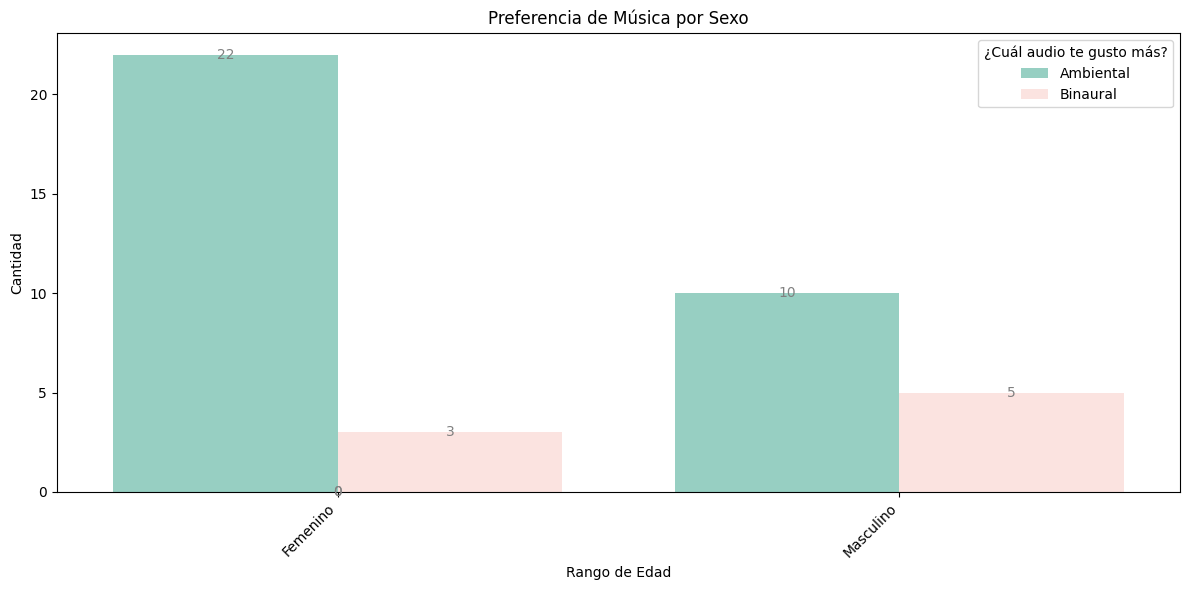

In [6]:
# Definir el orden deseado para el eje x

# Suponiendo que 'df' es tu DataFrame
plt.figure(figsize=(12, 6))
# ax = sns.countplot(x='¿En qué rango de edad te encuentras?', hue='¿Has escuchado música binaural antes? ', data=df, order=orden_edades)
# Colores personalizados para 'Sí' y 'No'
colores_personalizados = {'Ambiental': '#8ED8C7', 'Binaural': '#FFE0DB'}

# Crear un gráfico de barras con colores personalizados
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Sexo', hue='¿Cuál audio te gusto más?', data=df, palette=colores_personalizados.values())
plt.title('Preferencia de Música por Sexo')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.legend(title='¿Cuál audio te gusto más?')

# Añadir etiquetas a las barras
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', fontsize=10, color='gray')



# Rotar los labels del eje x en posición vertical
plt.xticks(rotation=45, ha='right')  # Ajusta el ángulo de rotación según sea necesario

plt.tight_layout()
plt.show()

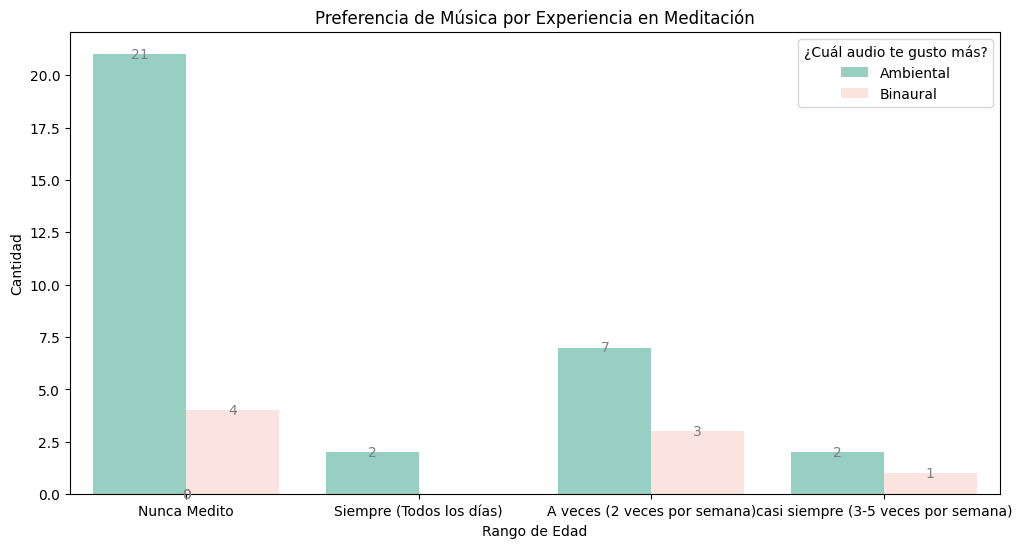

In [7]:
# Definir el orden deseado para el eje x
orden_edades = ['Menor de 18 años', '18-25 años', '26-35 años', '36-45 años', '46-55 años', '56 años en adelante']
colores_personalizados = {'Ambiental': '#8ED8C7', 'Binaural': '#FFE0DB'}


# Suponiendo que 'df' es tu DataFrame
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Experiencia con Meditación. ¿Meditas? ¿Con que frecuencia o Cuántas veces por semana? ¿Escuchas música al meditar?', hue='¿Cuál audio te gusto más?', data=df, palette=colores_personalizados.values())
plt.title('Preferencia de Música por Experiencia en Meditación')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.legend(title='¿Cuál audio te gusto más?')

# Añadir etiquetas a las barras
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', fontsize=10, color='gray')

plt.show()

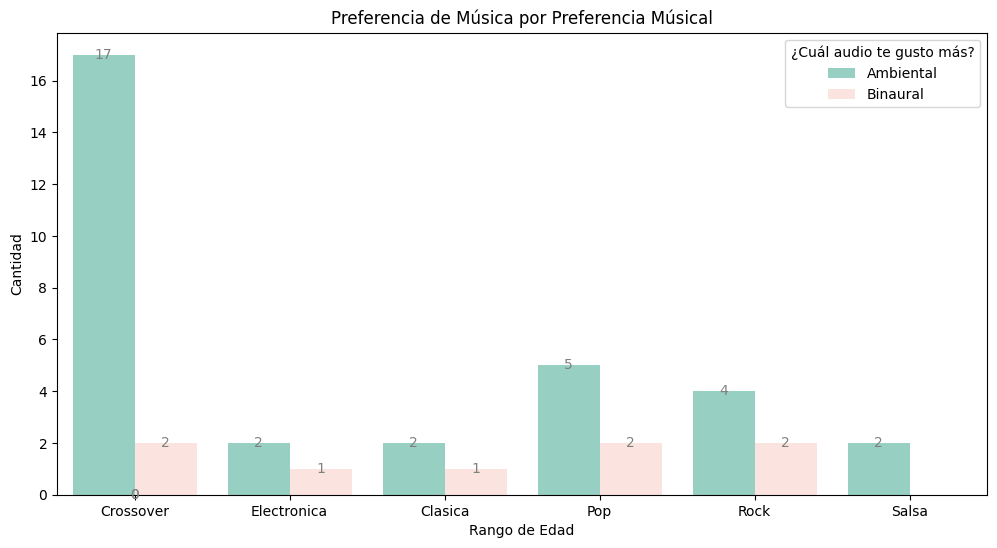

In [8]:
# Definir el orden deseado para el eje x
orden_edades = ['Menor de 18 años', '18-25 años', '26-35 años', '36-45 años', '46-55 años', '56 años en adelante']
colores_personalizados = {'Ambiental': '#8ED8C7', 'Binaural': '#FFE0DB'}


# Suponiendo que 'df' es tu DataFrame
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Experiencia Musical. ¿Tienes alguna preferencia musical? ¿Algún genero en especial que te guste mucho?', hue='¿Cuál audio te gusto más?', data=df, palette=colores_personalizados.values())
plt.title('Preferencia de Música por Preferencia Músical')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.legend(title='¿Cuál audio te gusto más?')

# Añadir etiquetas a las barras
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', fontsize=10, color='gray')

plt.show()

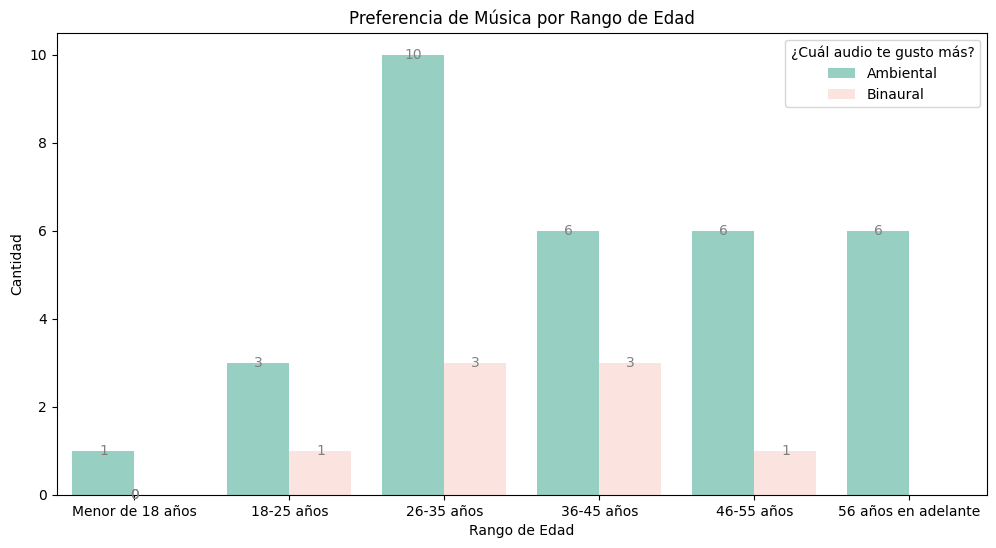

In [9]:
# Definir el orden deseado para el eje x
orden_edades = ['Menor de 18 años', '18-25 años', '26-35 años', '36-45 años', '46-55 años', '56 años en adelante']
colores_personalizados = {'Ambiental': '#8ED8C7', 'Binaural': '#FFE0DB'}


# Suponiendo que 'df' es tu DataFrame
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='¿En qué rango de edad te encuentras?', hue='¿Cuál audio te gusto más?', data=df, order=orden_edades, palette=colores_personalizados.values())
plt.title('Preferencia de Música por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.legend(title='¿Cuál audio te gusto más?')

# Añadir etiquetas a las barras
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', fontsize=10, color='gray')

plt.show()


<Figure size 1200x600 with 0 Axes>

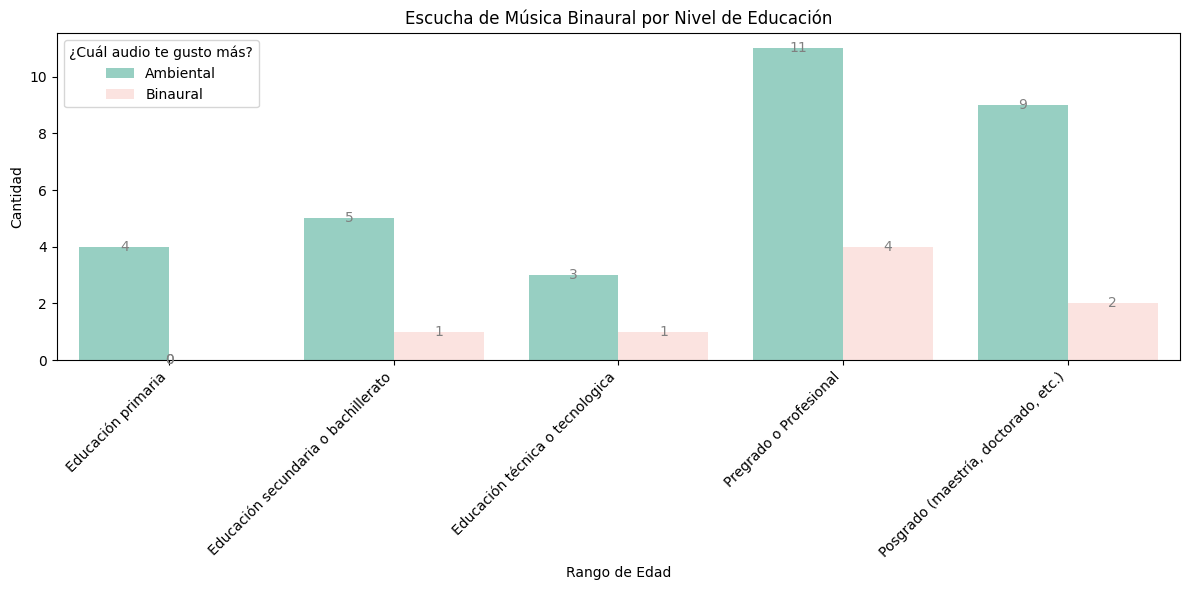

In [10]:
# Definir el orden deseado para el eje x
orden_educacion = ['Educación primaria', 'Educación secundaria o bachillerato', 'Educación técnica o tecnologica', 'Pregrado o Profesional', 'Posgrado (maestría, doctorado, etc.)']

# Suponiendo que 'df' es tu DataFrame
plt.figure(figsize=(12, 6))
# ax = sns.countplot(x='¿En qué rango de edad te encuentras?', hue='¿Has escuchado música binaural antes? ', data=df, order=orden_edades)
# Colores personalizados para 'Sí' y 'No'
colores_personalizados = {'Ambiental': '#8ED8C7', 'Binaural': '#FFE0DB'}

# Crear un gráfico de barras con colores personalizados
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='¿Cuál es tu nivel de educación alcanzado?', hue='¿Cuál audio te gusto más?', data=df, order=orden_educacion, palette=colores_personalizados.values())
plt.title('Escucha de Música Binaural por Nivel de Educación')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.legend(title='¿Cuál audio te gusto más?')

# Añadir etiquetas a las barras
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', fontsize=10, color='gray')



# Rotar los labels del eje x en posición vertical
plt.xticks(rotation=45, ha='right')  # Ajusta el ángulo de rotación según sea necesario

plt.tight_layout()
plt.show()

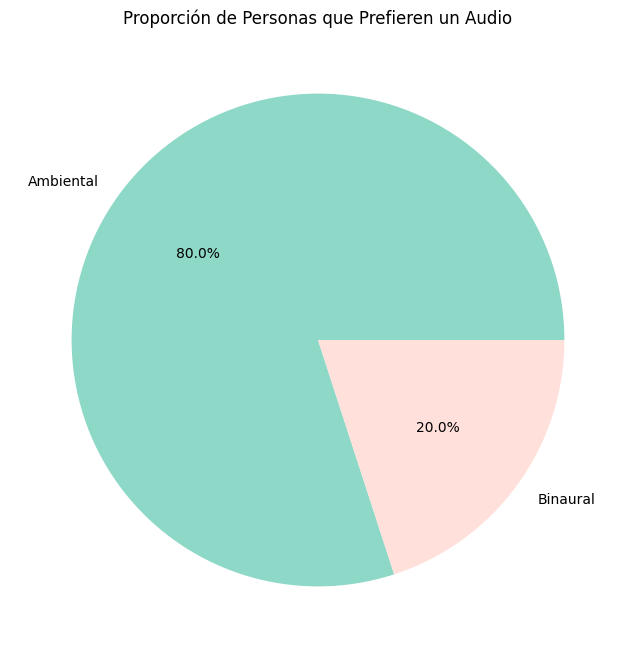

In [11]:
conteo_binaural = df['¿Cuál audio te gusto más?'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(conteo_binaural, labels=conteo_binaural.index, autopct='%1.1f%%', colors=['#8ED8C7', '#FFE0DB'])
plt.title('Proporción de Personas que Prefieren un Audio')
plt.show()


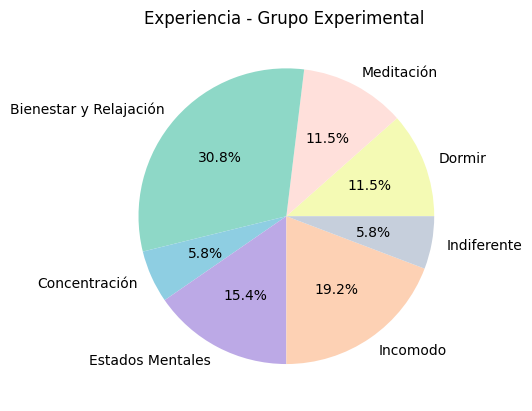

In [12]:
# Filtrar las personas que han experimentado relajación
d = len(df[(df['bdormir'] == '1')])
m = len(df[(df['bmeditacion'] == '1')])
b = len(df[(df['bbienestar'] == '1')])
c = len(df[(df['bconcentracion'] == '1')])
e = len(df[(df['bestadosmentales'] == '1')])
f = len(df[(df['bdesagrado'] == '1')])
g = len(df[(df['bindiferente'] == '1')])



labels= ['Dormir', 'Meditación', 'Bienestar y Relajación', 'Concentración', 'Estados Mentales', 'Incomodo', 'Indiferente']

# Crear un gráfico de torta
plt.pie([d,m,b,c,e, f, g], labels=labels, autopct='%1.1f%%', colors=[ '#F4FAB4', '#FFE0DB','#8ED8C7', '#8ECEE2', '#BCA9E6', '#FDD1B4', '#C6CFDC'])
plt.title('Experiencia - Grupo Experimental ')
plt.show()

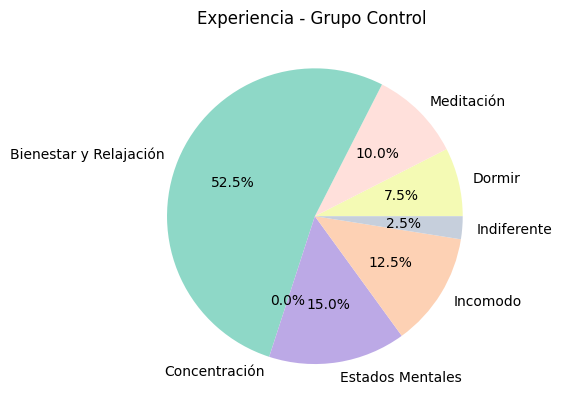

In [13]:
# Filtrar las personas que han experimentado relajación
d = len(df[(df['adormir'] == '1')])
m = len(df[(df['ameditacion'] == '1')])
b = len(df[(df['abienestar'] == '1')])
c = len(df[(df['aconcentracion'] == '1')])
e = len(df[(df['aestadosmentales'] == '1')])
f = len(df[(df['adesagrado'] == '1')])
g = len(df[(df['aindiferente'] == '1')])



labels= ['Dormir', 'Meditación', 'Bienestar y Relajación', 'Concentración', 'Estados Mentales', 'Incomodo', 'Indiferente']

# Crear un gráfico de torta
plt.pie([d,m,b,c,e, f, g], labels=labels, autopct='%1.1f%%', colors=[ '#F4FAB4', '#FFE0DB','#8ED8C7', '#8ECEE2', '#BCA9E6', '#FDD1B4', '#C6CFDC'])
plt.title('Experiencia - Grupo Control ')
plt.show()